In [4]:
%pip install scikit-learn
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas, matplotlib, sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pandas.read_csv('creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
class_counts = df['Class'].value_counts()

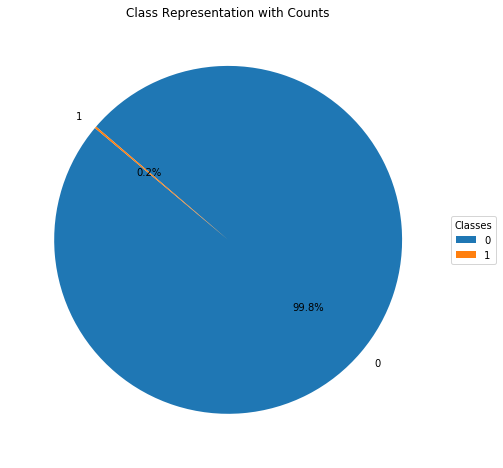

In [12]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8, 8))  
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Representation with Counts')
plt.legend(class_counts.index, title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()

In [13]:
pandas.options.display.float_format = '{:,.2f}'.format

df.groupby('Class')['Amount'].sum()

Class
0   25,102,462.04
1       60,127.97
Name: Amount, dtype: float64

In [19]:
from sklearn.utils import shuffle
import pandas as pd
from sklearn.utils import resample

# First, split the original dataframe into majority and minority classes
df_majority = shuffle(df[df['Class'] == 0])[:1000] # shuffle the dataframe and pick 1000 top row
df_minority = df[df['Class'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataframe to mix up the row orders
df_upsampled = shuffle(df_upsampled).reset_index(drop=True)
df_concat  = df_upsampled
# Display the new class counts
print(df_upsampled['Class'].value_counts())

1    1000
0    1000
Name: Class, dtype: int64


In [20]:
# df_0 = df[df['Class'] == 0].sample(n=492, random_state=42)
# df_1= df[df['Class'] == 1].sample(n=492, random_state=42)
# df_concat=pandas.concat([df_0,df_1], ignore_index=True).sample(frac=1)
# df_concat

In [21]:
x_notNormed=df_concat.drop(columns='Class', axis=1)
y=df_concat['Class']

In [22]:
scaler=StandardScaler()
x=scaler.fit_transform(x_notNormed)

In [24]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.10, random_state=123)
print(f'x_train{x_train.shape}\n, x_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(1800, 30)
, x_test(200, 30)
, y_train(1800,)
, y_test(200,)


In [49]:
def logic_regression(x_train, y_train, x_test):
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_train_pred=lr.predict(x_train)
    y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud']) #,output_dict=True)
    print("_"*100)
    print("TRAIN MODEL CLASSIFICATION REPORT")
    print("_"*100)
    print(y_train_cl_report)
#     for class_name, class_scores in y_train_cl_report.items():
#         if class_name not in ['micro avg', 'macro avg', 'weighted avg']:
#             print(f'Class: {class_name}')
#             for score_name, score_value in class_scores.items():
#                 print(f'  {score_name}: {score_value}')
#         elif class_name == 'accuracy':
#             print(f'Overall accuracy: {class_scores}')
    print("_"*100)
    #------------
    y_test_pred=lr.predict(x_test)
    y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud']) #,output_dict=True)
    print("_"*100)
    print("TEST MODEL CLASSIFICATION REPORT")
    print("_"*100)
    print(y_test_cl_report)
#     for class_name, class_scores in y_test_cl_report.items():
#         if class_name not in ['micro avg', 'macro avg', 'weighted avg']:
#             print(f'Class: {class_name}')
#             for score_name, score_value in class_scores.items():
#                 print(f'  {score_name}: {score_value}')
#         elif class_name == 'accuracy':
#             print(f'Overall accuracy: {class_scores}')
    print("_"*100)
    return y_test_pred, lr

y_test_pred, lr= logic_regression(x_train, y_train, x_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.92      0.98      0.95       903
       Fraud       0.98      0.91      0.94       897

   micro avg       0.95      0.95      0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

____________________________________________________________________________________________________
____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.91      0.95      0.93   

/Users/reihan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Conclusion
Overall, model is performing similarly on both the training and test datasets. The precision, recall, and F1-score are quite close for both classes across the two datasets. This is a good indicator that your model is neither severely overfitting nor underfitting.

Slight Difference, but Not Significant: While there's a slight drop in performance from training to test data (which is expected because models tend to perform slightly better on the data they have seen), the differences are not large enough to indicate overfitting. Similarly, the model's good performance on both sets indicates it is not underfitting.

In summary,  model seems well-tuned and balanced between not overfitting and not underfitting, demonstrating good generalization capabilities on unseen data. 

In [44]:
# i 
one_row_no_frad = df[df['Class'] == 0][:5]
print(one_row_no_frad)
one_row_no_frad_x = one_row_no_frad.drop(columns='Class', axis=1)
print(one_row_no_frad_x)

x_processed =scaler.fit_transform(one_row_no_frad_x)
x_processed

   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]
   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V20   V21  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ...  0.25 -0.02  

array([[-1.06904497, -0.64776215,  0.02489606,  1.25693233,  1.44299373,
        -0.44089305, -0.3397554 , -0.38461879, -0.0413235 ,  0.81799244,
        -0.23481898, -0.76449825, -1.55662235, -1.82933492,  0.26044349,
         0.65013096,  0.36831052,  0.25284548, -0.37015533,  0.79451781,
         0.25043983,  0.02852341,  0.06553072, -0.54915817,  0.95176322,
         0.13699697, -0.75126901,  0.64341732, -0.66257015,  0.03715604],
       [-1.06904497,  1.97732115,  0.49172258, -1.80512602,  0.13881464,
         1.34173505, -1.10347343, -1.43164682, -0.10390499,  0.15056695,
        -1.04055191,  1.67286069,  1.47635329,  0.09813019,  0.72166124,
        -0.15837998,  1.20531398, -0.28560428, -0.62487273,  0.30402641,
        -0.89867127, -1.29944057, -1.6525099 , -0.03222626,  0.12137184,
         0.25043866,  0.40470986, -0.8058021 , -0.2872492 , -1.11752614],
       [ 0.26726124, -0.64626726, -1.72072747,  0.27089742,  0.04293027,
        -1.17874561,  1.53622919,  1.43011932,  0

In [50]:
predictions = lr.predict(x_processed)
predictions

array([1, 1, 0, 0, 1])

In [53]:
coefficients = lr.coef_
coefficients


array([[-0.62861773,  0.52176338,  0.17507393, -0.83212154,  2.24088828,
         0.72260814, -0.54987257,  0.42703047, -1.14275207, -0.32829568,
        -1.45438595,  0.34274566, -0.90173425, -0.34865305, -3.39773534,
        -0.02185204,  0.49647394, -0.58182832,  0.27901146,  0.57100662,
        -0.59629391,  0.17705494,  0.64214858,  0.40301243, -0.10527266,
         0.0985403 , -0.11352188,  0.0482739 ,  0.34929194,  0.68867431]])

In [59]:
feature_names = df_concat.drop(columns='Class', axis=1).columns  # This assumes x_train is a DataFrame
coefficients_df = pandas.DataFrame(coefficients, columns=feature_names).T
coefficients_df
coefficients_df.columns = ['Coefficient']


In [64]:
coefficients_df.sort_values(by='Coefficient', ascending=False)


,Coefficient
V4,2.24
V5,0.72
Amount,0.69
V22,0.64
V19,0.57
V1,0.52
V16,0.50
V7,0.43
V23,0.40
V28,0.35


In [62]:
print(coefficients_df)

        Coefficient
Time          -0.63
V1             0.52
V2             0.18
V3            -0.83
V4             2.24
V5             0.72
V6            -0.55
V7             0.43
V8            -1.14
V9            -0.33
V10           -1.45
V11            0.34
V12           -0.90
V13           -0.35
V14           -3.40
V15           -0.02
V16            0.50
V17           -0.58
V18            0.28
V19            0.57
V20           -0.60
V21            0.18
V22            0.64
V23            0.40
V24           -0.11
V25            0.10
V26           -0.11
V27            0.05
V28            0.35
Amount         0.69
